Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


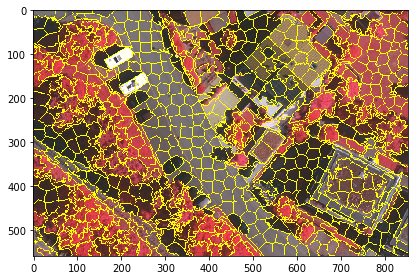

In [1]:
from skimage.io import *;
from SegHelperV2 import *;
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed, join_segmentations
from skimage.segmentation import mark_boundaries
from DeepSegment import *;


#create "Grid", we cann't upload very big image in github
# We can use bigger thesegments when need to obtain grid from bigger image 
thesegments= 800;
thecompactness=10;
imagefile=r".\\imgs\\test1.bmp";
gridresult=r".\\results\\grid.bmp";
image=imread(imagefile);
image=image[:,:,0:3];
nmimage=image/255;
segments=slic(image,n_segments=thesegments,compactness=thecompactness,start_label=0);
seghelper=SegHelperV2();
seghelper.readSegments(segments);
bd=mark_boundaries(image/255, segments);
imshow(bd);
imsave(gridresult,bd)

Run[ 000 ]


D:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Resize-559,853 to 131,200


D:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Gounp NUM=4,Break decsion 3-->30
Gounp NUM=4,Break decsion 3-->31
Gounp NUM=4,Break decsion 3-->32
Gounp NUM=2,Break decsion 5-->33
Gounp NUM=2,Break decsion 7-->34
Gounp NUM=2,Break decsion 10-->35
Gounp NUM=8,Break decsion 14-->36
Gounp NUM=8,Break decsion 14-->37
Gounp NUM=8,Break decsion 14-->38
Gounp NUM=8,Break decsion 14-->39
Gounp NUM=8,Break decsion 14-->40
Gounp NUM=8,Break decsion 14-->41
Gounp NUM=8,Break decsion 14-->42
Gounp NUM=2,Break decsion 17-->43
Gounp NUM=3,Break decsion 22-->44
Gounp NUM=3,Break decsion 22-->45
Gounp NUM=2,Break decsion 28-->46
Run[ 001 ]
Resize-559,853 to 131,200
Resize-263,220 to 200,167
Resize-380,289 to 200,152
Resize-180,278 to 129,200
Resize-400,355 to 200,177
Resize-164,252 to 130,200
Resize-157,219 to 143,200
Gounp NUM=5,Break decsion 1-->121
Gounp NUM=5,Break decsion 1-->122
Gounp NUM=5,Break decsion 1-->123
Gounp NUM=5,Break decsion 1-->124
Gounp NUM=6,Break decsion 9-->125
Gounp NUM=6,Break decsion 9-->126
Gounp NUM=6,Break decsion 9-->

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Gounp NUM=2,Break decsion 4-->463
Gounp NUM=2,Break decsion 30-->464
Gounp NUM=2,Break decsion 108-->465
Gounp NUM=2,Break decsion 109-->466
Gounp NUM=2,Break decsion 171-->467
Gounp NUM=2,Break decsion 244-->468
Gounp NUM=2,Break decsion 270-->469
Gounp NUM=2,Break decsion 402-->470
Gounp NUM=2,Break decsion 443-->471


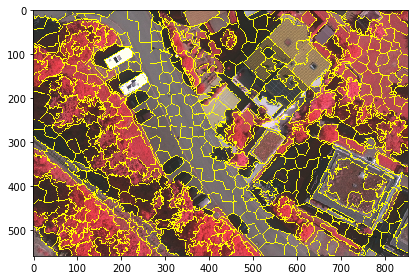

In [2]:
#Perform HOFG

thesavestepimgpath=".\\results\\"
mingrids=3;

# add parameter oresizeBigImage=True,oresizeMaxwidth=300
# the max value of oresizeMaxwidth decide by your GPU's memory
# when use oresizeBigImage+oresizeMaxwidth, HOFG can segment very big images.
result=runDeepSeg(seghelper,image,maxiter=4,oresizeBigImage=True,oresizeMaxwidth=200,theMinGrids=mingrids);
bd=mark_boundaries(nmimage, result,mode='thick');
imshow(bd);
resultpath=".\\results\\ZI-HOFG-resize.bmp"
imsave(resultpath,bd)
resultnpz=".\\results\\ZS-HOFG-resize";
np.save(resultnpz,result);